In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Caschool.csv", low_memory = False)

print(len(data))
print(len(data.columns))

420
17


In [4]:
data.head()

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024


In [5]:
print(data.columns)

Index(['distcod', 'county', 'district', 'grspan', 'enrltot', 'teachers',
       'calwpct', 'mealpct', 'computer', 'testscr', 'compstu', 'expnstu',
       'str', 'avginc', 'elpct', 'readscr', 'mathscr'],
      dtype='object')


In [6]:
a = pd.DataFrame(data, columns = ["county", "enrltot", "teachers", "computer", "testscr", "str", "avginc", "readscr", "mathscr"])

In [7]:
a.head()

,county,enrltot,teachers,computer,testscr,str,avginc,readscr,mathscr
0,Alameda,195,10.900000,67,690.799988,17.889910,22.690001,691.599976,690.000000
1,Butte,240,11.150000,101,661.200012,21.524664,9.824000,660.500000,661.900024
2,Butte,1550,82.900002,169,643.599976,18.697226,8.978000,636.299988,650.900024
3,Butte,243,14.000000,85,647.700012,17.357143,8.978000,651.900024,643.500000
4,Butte,1335,71.500000,171,640.849976,18.671330,9.080333,641.799988,639.900024


In [8]:
import seaborn

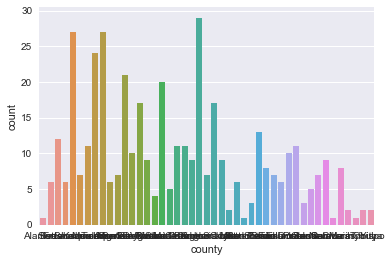

In [9]:
%matplotlib inline

seaborn.countplot(x='county', data = a)
plt.xlabel = ("County")
plt.ylabel = ("Count of county")
plt.title = ("Number of students per county")

/Users/johnhu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


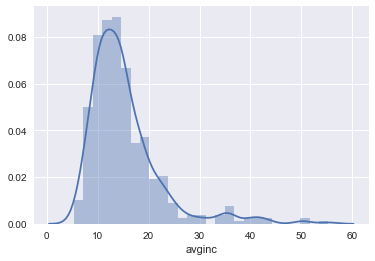

In [10]:
seaborn.distplot(a["avginc"].dropna())

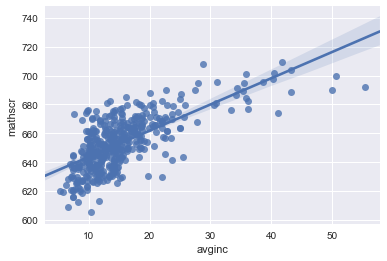

In [100]:
seaborn.regplot(x='avginc', y='mathscr', data=a, fit_reg=True)


In [101]:
import statsmodels.api as sm

In [102]:
result = sm.OLS(a['mathscr'], a['avginc']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mathscr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     2092.
Date:                Wed, 29 Mar 2017   Prob (F-statistic):          5.04e-165
Time:                        13:30:33   Log-Likelihood:                -2942.6
No. Observations:                 420   AIC:                             5887.
Df Residuals:                     419   BIC:                             5891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
avginc        35.2354      0.770     45.742      0.000        33.721    36.750
==============================================================================
Omnibus:                      220.710   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1216.950
Skew:                          -2.288   Prob(JB):                    5.53e-265
Kurtosis:                       9.971   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
a.corr()

,enrltot,teachers,computer,testscr,str,avginc,readscr,mathscr
enrltot,1.000000,0.997116,0.928882,-0.153988,0.298481,0.028392,-0.188399,-0.110889
teachers,0.997116,1.000000,0.937242,-0.144857,0.264641,0.043007,-0.179109,-0.102296
computer,0.928882,0.937242,1.000000,-0.073736,0.233826,0.094343,-0.109005,-0.032950
testscr,-0.153988,-0.144857,-0.073736,1.000000,-0.226363,0.712431,0.981882,0.979143
str,0.298481,0.264641,0.233826,-0.226363,1.000000,-0.232194,-0.246593,-0.195553
avginc,0.028392,0.043007,0.094343,0.712431,-0.232194,1.000000,0.697819,0.699398
readscr,-0.188399,-0.179109,-0.109005,0.981882,-0.246593,0.697819,1.000000,0.922901
mathscr,-0.110889,-0.102296,-0.032950,0.979143,-0.195553,0.699398,0.922901,1.000000
